<a href="https://colab.research.google.com/github/Amirhatamian/ML-/blob/main/MLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

4422102/4422102 [==============================] - 1s 0us/step


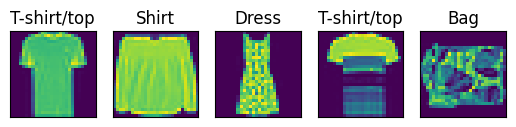

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define the labels dictionary
labels_dict = {
    '0': 'T-shirt/top',
    '1': 'Trouser',
    '2': 'Pullover',
    '3': 'Dress',
    '4': 'Coat',
    '5': 'Sandal',
    '6': 'Shirt',
    '7': 'Sneaker',
    '8': 'Bag',
    '9': 'Ankle boot',
    '10': 'Shoes'  # Added label for shoes
}

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Display original images with labels
n = 5
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(x_test[select_img_index])
    plt.title(labels_dict[str(y_test[select_img_index])])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
latent_dim = 64

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0240 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

In [ ]:
autoencoder.encoder.summary(), autoencoder.decoder.summary();


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                              

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

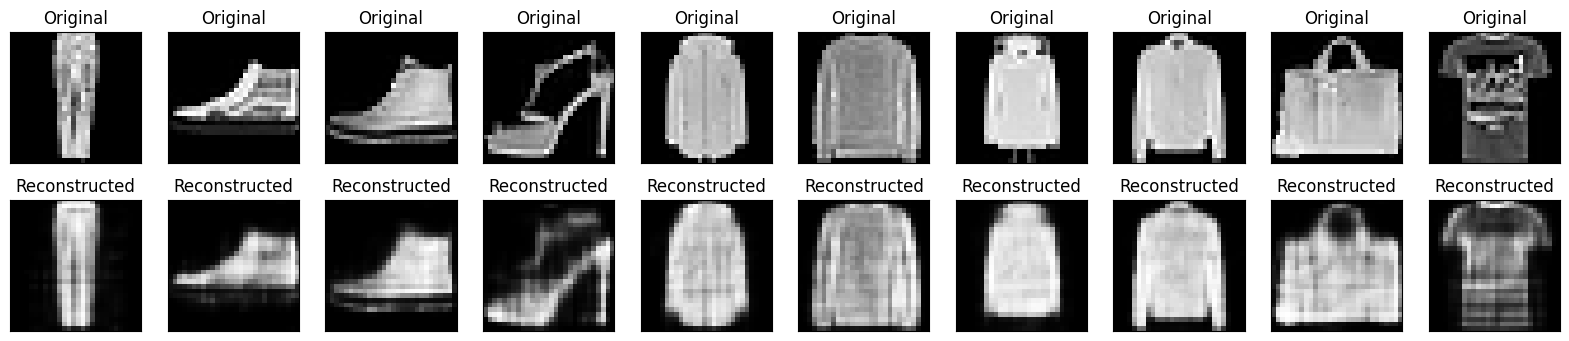

In [ ]:
n = 10
plt.figure(figsize=(20, 4))

# Assuming you have x_test_noisy and decoded_imgs defined somewhere in your code
# Replace 'x_test_noisy' and 'decoded_imgs' with your actual variable names

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    select_img_index = np.random.randint(x_test.shape[0])  # Assuming x_test is defined
    plt.imshow(np.squeeze(x_test[select_img_index]))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.squeeze(decoded_imgs[select_img_index]))  # Assuming decoded_imgs is defined
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [ ]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
print(dataframe.shape)
dataframe.head()

(4998, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:

# Download the dataset
url = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
dataframe = pd.read_csv(url, header=None)
print(dataframe.shape)
dataframe.head()


(4998, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
#The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [ ]:
# Normalize to 0 - 1
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

train_data, normal_test_data, anomalous_train_data

(<tf.Tensor: shape=(3998, 140), dtype=float32, numpy=
 array([[0.57030463, 0.46561658, 0.29058117, ..., 0.48504233, 0.4233502 ,
         0.47598344],
        [0.48320588, 0.28246963, 0.16471253, ..., 0.567567  , 0.4677294 ,
         0.2692329 ],
        [0.48144642, 0.35151404, 0.25972766, ..., 0.5479421 , 0.5077544 ,
         0.54298663],
        ...,
        [0.41039047, 0.24164985, 0.13120876, ..., 0.5277313 , 0.5654091 ,
         0.5023885 ],
        [0.5397748 , 0.4140786 , 0.28101394, ..., 0.51266515, 0.43706053,
         0.4426865 ],
        [0.29639772, 0.15988176, 0.18883787, ..., 0.53766966, 0.545786  ,
         0.40826708]], dtype=float32)>,
 <tf.Tensor: shape=(560, 140), dtype=float32, numpy=
 array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
         0.3713729 ],
        [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
         0.49527124],
        [0.4521779 , 0.25685105, 0.12592098, ..., 0.55448556, 0.5861353 ,
         0.4754273 ]

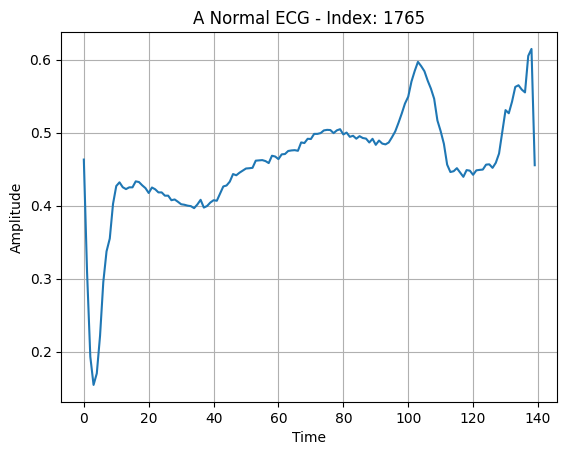

In [ ]:
plt.grid()
selected_index = np.random.randint(normal_train_data.shape[0])
plt.plot(np.arange(140), normal_train_data[selected_index])
plt.title(f"A Normal ECG - Index: {selected_index}")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

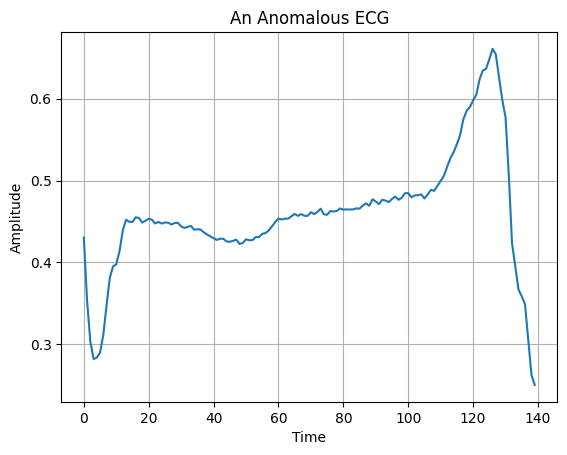

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Dense(32, activation="relu", input_shape=(140,)),  # Adjust input_shape based on your data
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()


In [ ]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Dense(64, activation="relu", input_shape=(140,)),
          layers.Dropout(0.2),  # Adding dropout for regularization
          layers.Dense(32, activation="relu"),
          layers.BatchNormalization(),  # Adding batch normalization for stable training
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.BatchNormalization(),
          layers.Dense(32, activation="relu"),
          layers.Dense(64, activation="relu"),
          layers.Dropout(0.2),
          layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()


In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')


In [ ]:
history = autoencoder.fit(
    x=normal_train_data,
    y=normal_train_data,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_data),
    shuffle=True
)


Epoch 1/20
5/5 [==============================] - 3s 64ms/step - loss: 0.0703 - val_loss: 0.0533
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0607 - val_loss: 0.0527
Epoch 3/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0544 - val_loss: 0.0519
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0492 - val_loss: 0.0506
Epoch 5/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0450 - val_loss: 0.0493
Epoch 6/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0416 - val_loss: 0.0478
Epoch 7/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0386 - val_loss: 0.0464
Epoch 8/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0362 - val_loss: 0.0444
Epoch 9/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0340 - val_loss: 0.0421
Epoch 10/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0322 - val_loss: 0.0404
Epoch 11/20
5/5 [============

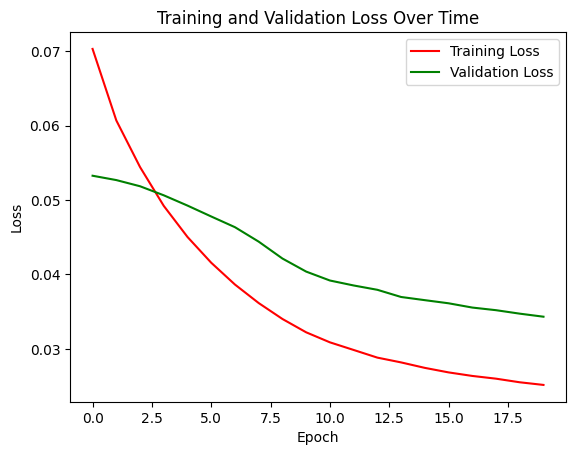

In [ ]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss", color="Red")
plt.plot(history.history["val_loss"], label="Validation Loss", color="Green")

# Add labels and title
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Time")

# Display legend
plt.legend()

# Show the plot
plt.show()


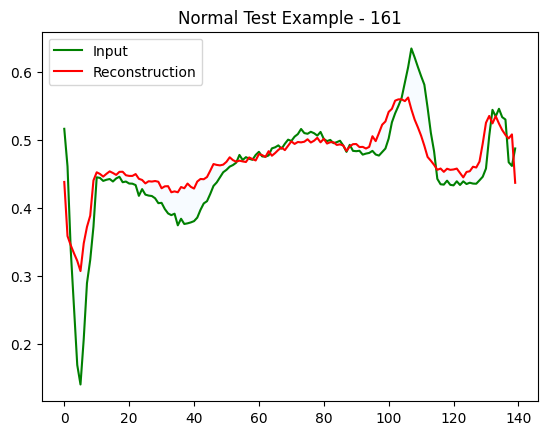

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data)
decoded_data = autoencoder.decoder(encoded_data)

selected_index = np.random.randint(normal_test_data.shape[0])

plt.plot(normal_test_data[selected_index], label='Input', color='g')
plt.plot(decoded_data.numpy()[selected_index], label='Reconstruction', color='r')

# Compute the absolute error
error = np.abs(normal_test_data[selected_index] - decoded_data.numpy()[selected_index])

plt.fill_between(np.arange(140), decoded_data.numpy()[selected_index], normal_test_data[selected_index], color='aliceblue', alpha=0.5)

plt.title(f'Normal Test Example - {selected_index}')
plt.legend()
plt.show()


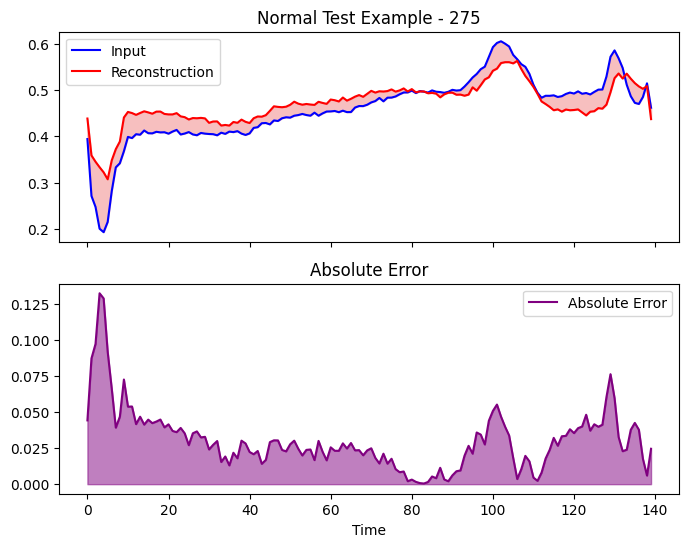

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data)
decoded_data = autoencoder.decoder(encoded_data)

selected_index = np.random.randint(normal_test_data.shape[0])

input_data = normal_test_data[selected_index]
reconstructed_data = decoded_data.numpy()[selected_index]

# Compute the absolute error
error = np.abs(input_data - reconstructed_data)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot Input and Reconstruction
ax1.plot(input_data, label='Input', color='b')
ax1.plot(reconstructed_data, label='Reconstruction', color='r')
ax1.fill_between(np.arange(140), reconstructed_data, input_data, color='lightcoral', alpha=0.5)
ax1.legend()
ax1.set_title(f'Normal Test Example - {selected_index}')

# Plot Error
ax2.plot(error, label='Absolute Error', color='purple')
ax2.fill_between(np.arange(140), 0, error, color='purple', alpha=0.5)
ax2.legend()
ax2.set_title('Absolute Error')

plt.xlabel('Time')
plt.show()


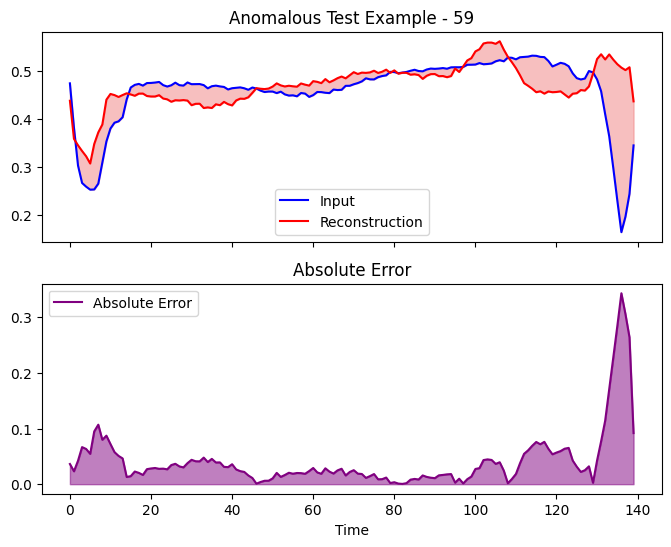

In [ ]:
encoded_data_anomalous = autoencoder.encoder(anomalous_test_data)
decoded_data_anomalous = autoencoder.decoder(encoded_data_anomalous)

selected_index_anomalous = np.random.randint(anomalous_test_data.shape[0])

input_data_anomalous = anomalous_test_data[selected_index_anomalous]
reconstructed_data_anomalous = decoded_data_anomalous.numpy()[selected_index_anomalous]

# Compute the absolute error
error_anomalous = np.abs(input_data_anomalous - reconstructed_data_anomalous)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot Input and Reconstruction
ax1.plot(input_data_anomalous, label='Input', color='b')
ax1.plot(reconstructed_data_anomalous, label='Reconstruction', color='r')
ax1.fill_between(np.arange(140), reconstructed_data_anomalous, input_data_anomalous, color='lightcoral', alpha=0.5)
ax1.legend()
ax1.set_title(f'Anomalous Test Example - {selected_index_anomalous}')

# Plot Error
ax2.plot(error_anomalous, label='Absolute Error', color='purple')
ax2.fill_between(np.arange(140), 0, error_anomalous, color='purple', alpha=0.5)
ax2.legend()
ax2.set_title('Absolute Error')

plt.xlabel('Time')
plt.show()


74/74 [==============================] - 0s 2ms/step


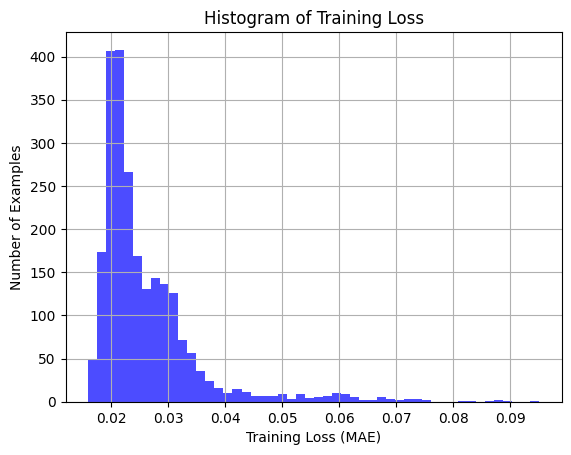

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50, color='blue', alpha=0.7)
plt.xlabel("Training Loss (MAE)")
plt.ylabel("Number of Examples")
plt.title("Histogram of Training Loss")
plt.grid(True)
plt.show()


In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print(f"Anomaly Detection Threshold: {threshold:.4f}")


Anomaly Detection Threshold: 0.0356


In [ ]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    predictions = tf.math.less(loss, threshold)
    return predictions.numpy().astype(int)

def print_stats(predictions, labels):
    print(classification_report(labels, predictions))

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)


              precision    recall  f1-score   support

       False       0.90      0.96      0.93       440
        True       0.97      0.92      0.94       560

    accuracy                           0.94      1000
   macro avg       0.93      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.937
Precision = 0.9697542533081286
Recall = 0.9160714285714285
